# Goals:

i: Analyze movie vs. TV show counts

ii: Plot content trends over the years

iii: Top genres, countries, and release years

## 1) libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Reading Data


In [2]:
data = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.shape

(8807, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## 3) Data cleaning

### a) Feature selection

In [7]:
netflix_data = data[['type', 'title', 'country', 'release_year', 'listed_in']]

### b) check for nulls

In [8]:
netflix_data.isnull().sum()

type              0
title             0
country         831
release_year      0
listed_in         0
dtype: int64

In [9]:
netflix_data.shape

(8807, 5)

In [10]:
netflix_data.dropna( inplace=True)

/tmp/ipykernel_13/813331101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data.dropna( inplace=True)


In [11]:
netflix_data.isnull().sum()

type            0
title           0
country         0
release_year    0
listed_in       0
dtype: int64

In [12]:
netflix_data.shape

(7976, 5)

## 4) Movie vs. TV show

### a) Counts

In [13]:
netflix_data['type'].value_counts()

type
Movie      5691
TV Show    2285
Name: count, dtype: int64

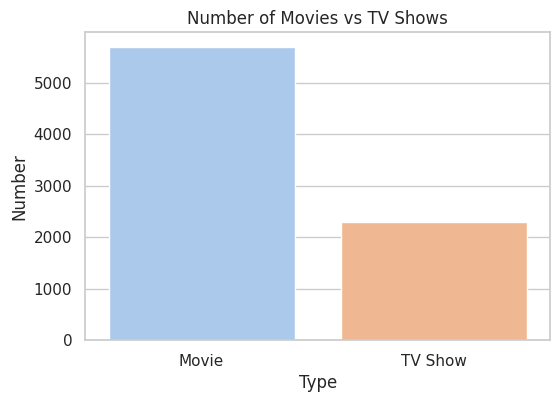

In [14]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(netflix_data, x='type', palette='pastel')
plt.title('Number of Movies vs TV Shows')
plt.ylabel('Number')
plt.xlabel('Type')
plt.show()

### b) Percentage

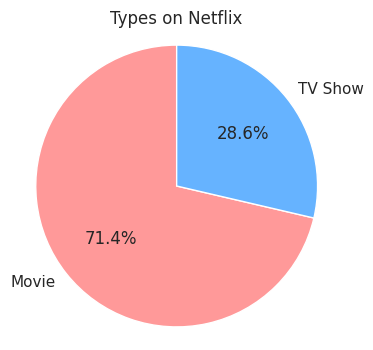

In [15]:
type_counts = netflix_data['type'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Types on Netflix')
plt.axis('equal')
plt.show()

### c) Content over the years

In [16]:
content_trend = netflix_data.groupby(['release_year', 'type']).size().reset_index(name='count')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

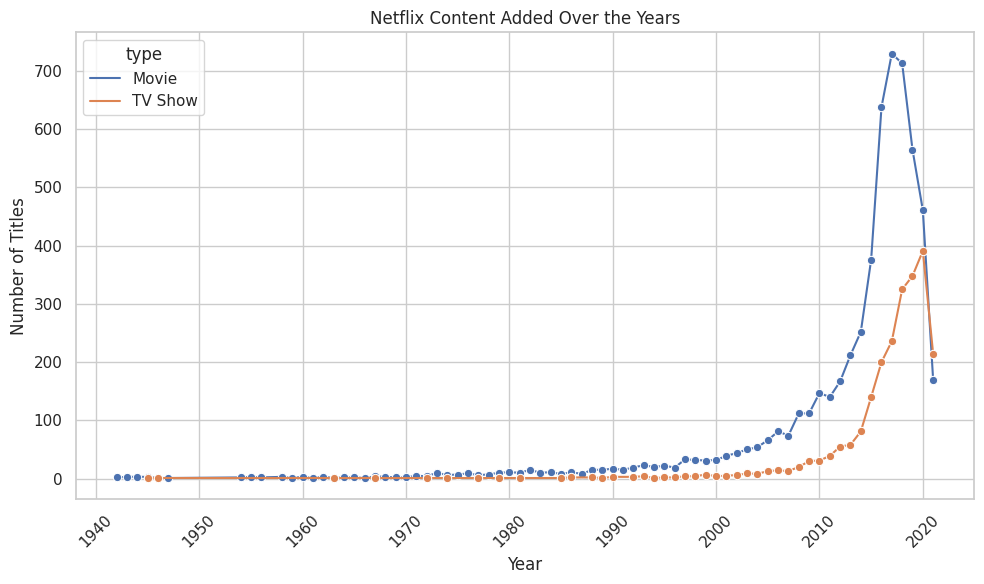

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=content_trend, x='release_year', y='count', hue='type', marker='o')
plt.title('Netflix Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 5) Top 10 genres

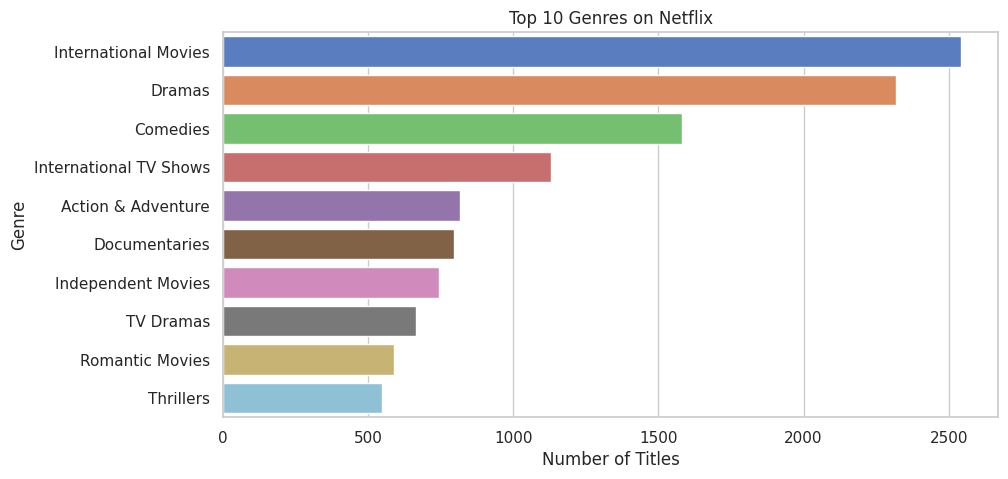

In [18]:
genres = netflix_data.assign(genre=data['listed_in'].str.split(',')).explode('genre')
genres['genre'] = genres['genre'].str.strip()

top_genres = genres['genre'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='muted')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

## 6) Top 10 Countries

In [19]:
top_countries = netflix_data['country'].value_counts().head(10)

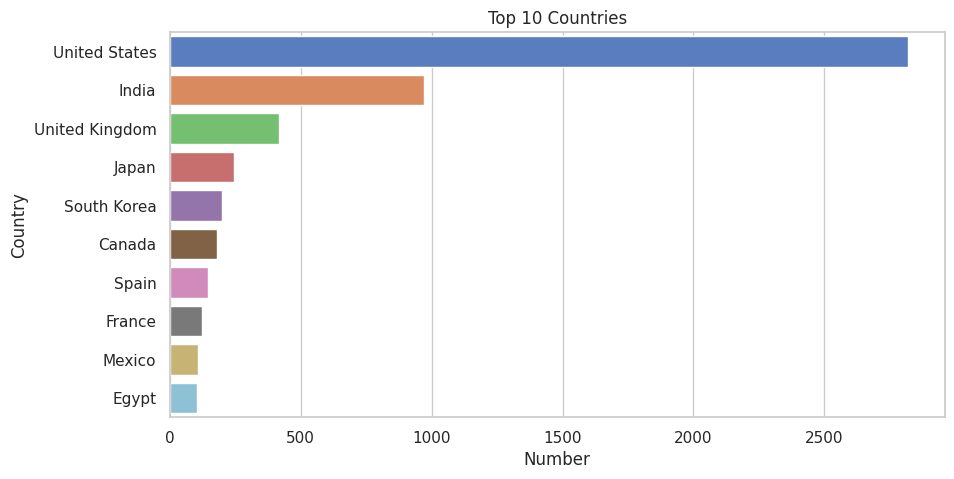

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='muted')
plt.title('Top 10 Countries')
plt.xlabel('Number')
plt.ylabel('Country')
plt.show()

## 7) Top 10 Years

In [21]:
top_year = netflix_data['release_year'].value_counts().head(10)
top_year_df = top_year.reset_index()
top_year_df.columns = ['Year', 'Count']

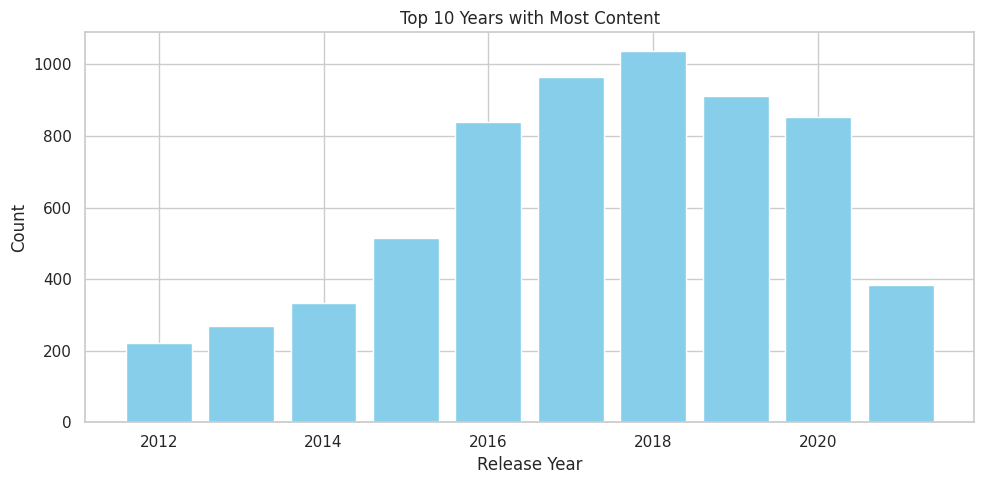

In [22]:
plt.figure(figsize=(10, 5))
plt.bar(top_year_df['Year'], top_year_df['Count'], color='skyblue')
plt.title('Top 10 Years with Most Content')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
